In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [197]:
dataset = pd.read_csv("https://raw.githubusercontent.com/CodexploreRepo/data-science/refs/heads/main/Code/P01_Pre_Processing/Data.csv")
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [198]:
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


## Data Imputation

In [200]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [201]:
for col in dataset.columns:
    missing_data = dataset[col].isna().sum()
    missing_per = missing_data /len(dataset)*100
    print(f"Column {col} has {missing_per}% missing data")

Column Country has 0.0% missing data
Column Age has 10.0% missing data
Column Salary has 10.0% missing data
Column Purchased has 0.0% missing data


In [202]:
print(dataset.isna().value_counts())

Country  Age    Salary  Purchased
False    False  False   False        8
                True    False        1
         True   False   False        1
Name: count, dtype: int64


<Axes: >

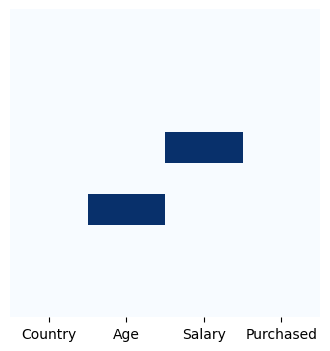

In [203]:
plt.figure(figsize = (4,4))
sns.heatmap(dataset.isna(), cbar = False, cmap = "Blues", yticklabels = False )

In [204]:
x = dataset.iloc[:,:-1].values; x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [205]:
y = dataset.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [206]:
from sklearn.impute import SimpleImputer
#Create and instance of class imputer
imputer = SimpleImputer(missing_values=np.nan, strategy= "mean")
imputer.fit(x[:, 1:3])
x[:,1:3]=imputer.transform(x[:,1:3]); x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encode Categorical (mã hóa dữ liệu danh mục)

* Encode Exploratory Variable
* Encode Respone Variable

In [209]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [210]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0])], remainder = "passthrough")

In [211]:
x = ct.fit_transform(x); x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

#### -> Easy to fix in Machine learning Model

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y); y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Split the dataset to training and testing

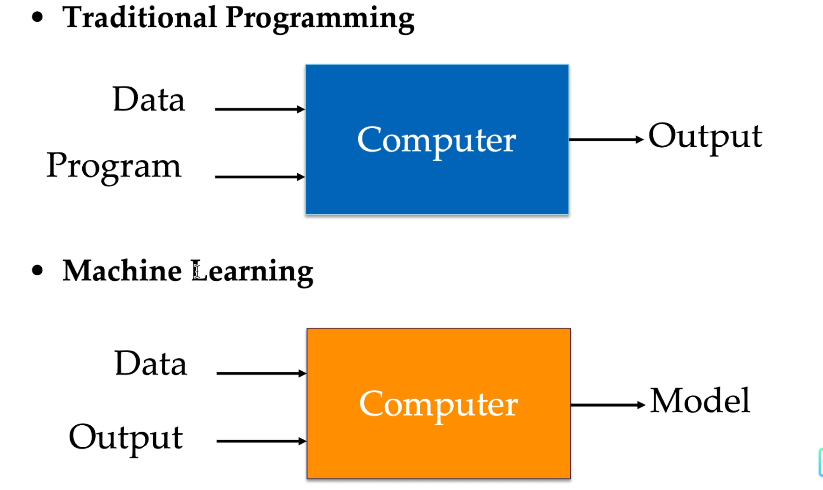

để training machine learning model thì ta cần dữ liệu đầu vào vào output để bỏ vào traning ra model

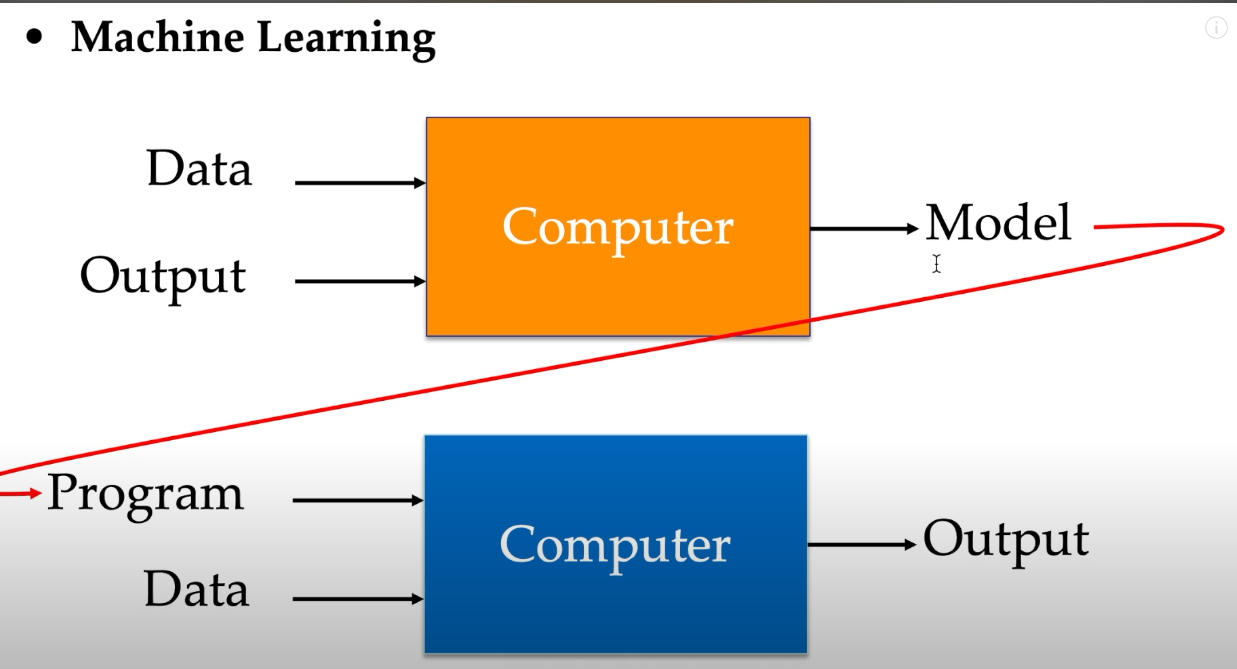

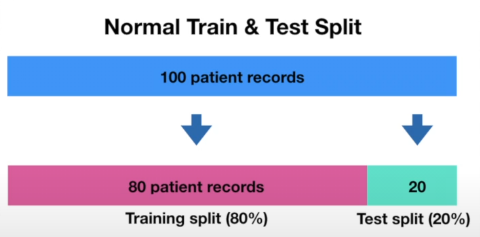

In [219]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [220]:
x_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [221]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [222]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [223]:
y_test

array([0, 1])

## Feature Scaling (Co giãn dữ liệu)

In [248]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:]= sc.fit_transform(x_train[:,3:]); x_train
x_test[:,3:] = sc.transform(x_test[:,3:]); x_test

array([[0.0, 1.0, 0.0, 49.999999999999986, 83000.0],
       [0.0, 0.0, 1.0, 26.999999999999993, 48000.0]], dtype=object)

In [250]:
x_test 

array([[0.0, 1.0, 0.0, 49.999999999999986, 83000.0],
       [0.0, 0.0, 1.0, 26.999999999999993, 48000.0]], dtype=object)

# Logistic Regression Training 

In [253]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

### Evaluate Model


In [258]:
logistic_clf.score(x_train, y_train) #đánh giá model

0.875

In [260]:
logistic_clf.score(x_test, y_test)

0.5

In [264]:
y_preds = logistic_clf.predict(x_test)
y_preds

array([1, 1])

In [266]:
y_test

array([0, 1])

In [268]:
logistic_clf.predict([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425]])

array([0])